In [2]:
#import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
#import online data 
from sklearn.datasets import load_digits

In [4]:
digits= load_digits()

In [5]:
# input variables  or features (X)
digits.data.shape
X = digits.data
# means 1797 pictures size is 64 (8x8)

In [6]:
# output labels (y)
digits.target.shape
y= digits.target

<Figure size 432x288 with 0 Axes>

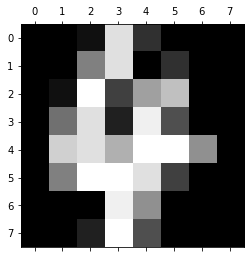

In [7]:
plt.gray()
plt.matshow(digits.images[520])

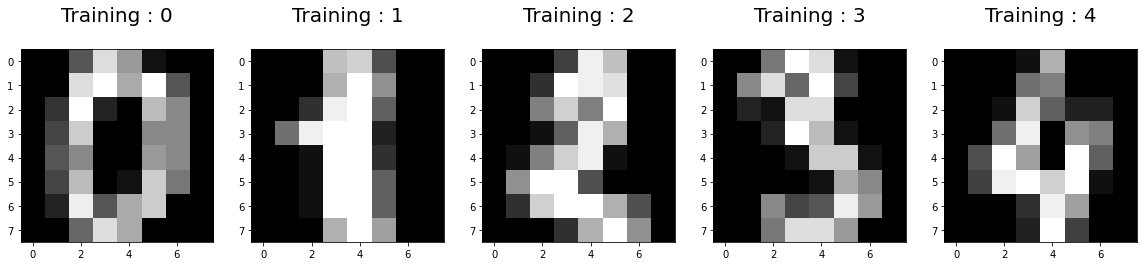

In [8]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    #using image(8,8) because we've seen the picsize of 64 i.e 8x8
    plt.imshow(np.reshape(image,(8,8)), cmap= plt.cm.gray)
    plt.title("Training : %i\n" % label, fontsize = 20)
    

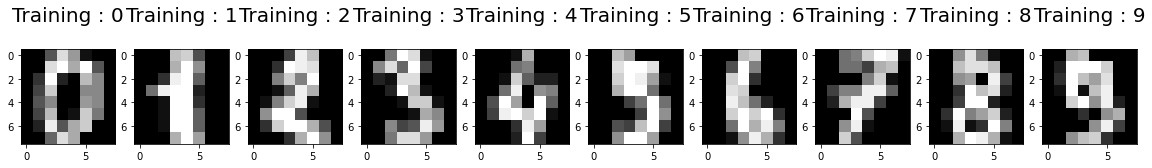

In [9]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1,10, index+1)
    #using image(8,8) because we've seen the picsize of 64 i.e 8x8
    plt.imshow(np.reshape(image,(8,8)), cmap= plt.cm.gray)
    plt.title("Training : %i\n" % label, fontsize = 20)

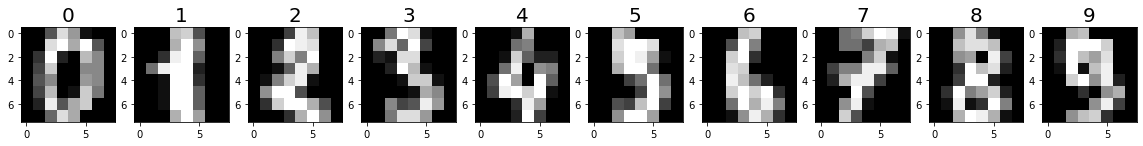

In [10]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1,10, index+1)
    #using image(8,8) because we've seen the picsize of 64 i.e 8x8
    plt.imshow(np.reshape(image,(8,8)), cmap= plt.cm.gray)
    plt.title(label, fontsize = 20)

In [11]:
#help(plt)

In [12]:
#split the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split (X, y, test_size=0.25  ,random_state= 0)

In [13]:
print("Train input data : " , X_train.shape)
print("Test input data : " , X_test.shape)
print("Train output data : " , y_train.shape)
print("Test output data : " , y_test.shape)

Train input data :  (1347, 64)
Test input data :  (450, 64)
Train output data :  (1347,)
Test output data :  (450,)


In [14]:
# training a model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train,y_train)
model

C:\Users\Epazz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
# prediction 
model.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [16]:
y_pred = model.predict(X_test)
y_pred.shape

(450,)

In [17]:
# Accuracy score 
score= model.score(X_test, y_test)
score 
# yha pe X_test ko as an input leta hai pr X_test ki prediction ko , y_test se compare kr k k score bta rha 

0.9511111111111111

In [18]:
# Confusion matrix 
from sklearn import metrics
cm= metrics.confusion_matrix(y_test, y_pred)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 40,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]], dtype=int64)

### Confusion matrix through Seaborn 

Text(0.5, 1.0, 'Accuracy Score : 0.9511111111111111')

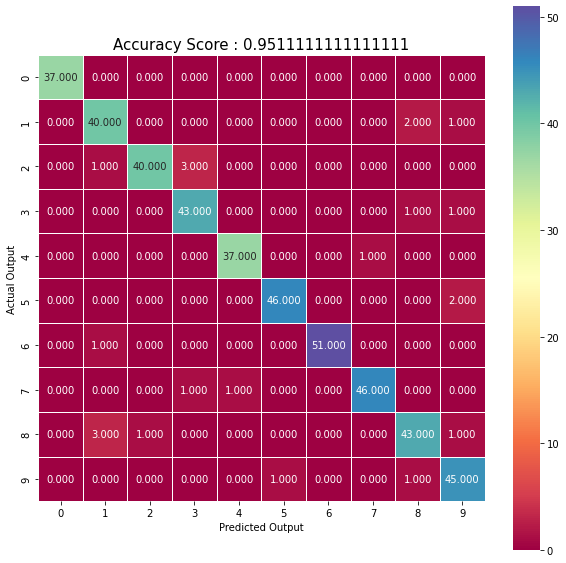

In [55]:
#plotting a confusion metrix 
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5 , square= True, cmap= "Spectral")
plt.ylabel("Actual Output")
plt.xlabel("Predicted Output")
title = "Accuracy Score : {0}".format(score)
plt.title(title, size= 15)

### Confusion matrix through Matplotlib

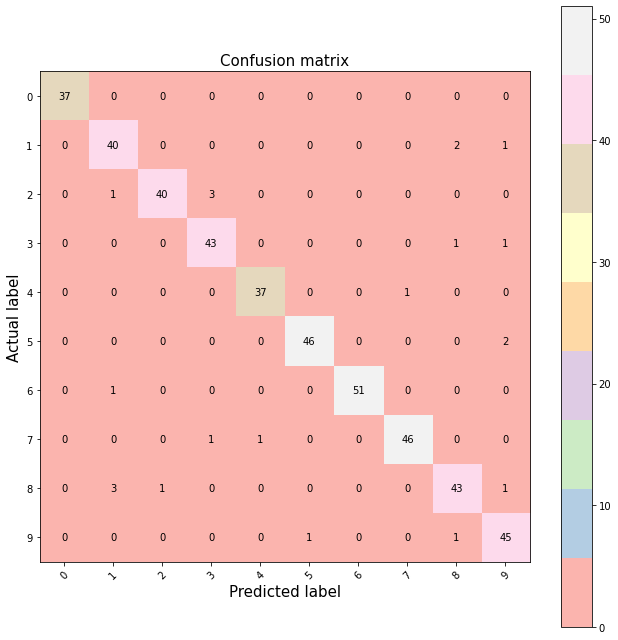

In [56]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range (width):
 for y in range (height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

## Display Misclassified images with Predicted Labels 

In [57]:
# Getting a mis classified lables 
index= 0
misclassifiedIndex = []
for label, predict in zip(y_pred , y_test):
    if predict != label:
        misclassifiedIndex.append(index)
        print(label,predict,index)
    index +=1
    

9 5 56
4 7 94
1 6 118
1 8 124
5 9 130
9 8 169
9 5 181
1 8 196
8 1 213
3 2 235
3 2 251
7 4 315
9 1 325
8 1 331
2 8 335
8 3 378
1 8 398
1 2 415
3 7 425
8 9 429
9 3 430
3 2 440


In [51]:
#error is this 
# # Getting a mis classified lables 
# index= 0
# misclassifiedIndex = []
# for label, predict in zip(y_pred , y_test):
#     if predict != label:
#         misclassifiedIndex.append(index)
#         print(label,predict,index)
#         index +=1
    

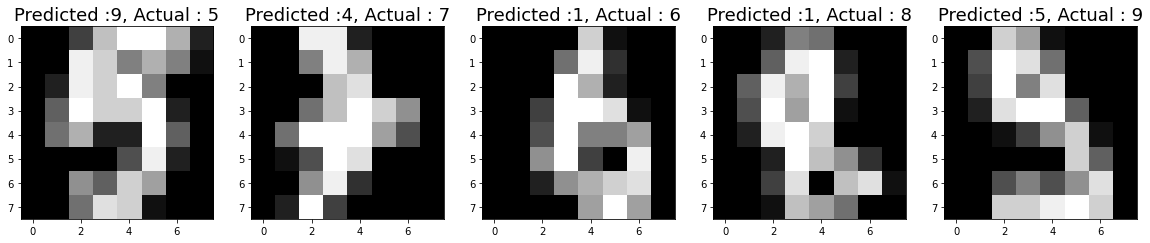

In [58]:
# plotting missclassified label with know 
plt.figure(figsize= (20,5))
for plotIndex, badIndex in enumerate ( misclassifiedIndex[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow (np.reshape(X_test[badIndex],(8,8)), cmap= plt.cm.gray)
    plt.title("Predicted :{}, Actual : {}".format (y_pred[badIndex], y_test[badIndex]), fontsize=18)